# Tutorial 4 - Sensitivity kernels for displacement point measurements. 

In this tutorial we show how sensitivity kernels for point measurements of vertical displacement can be calculated. This is again based on the reciprocity theorems in Al-Attar *et al.* (2024), but in this case it is necessary to consider solutions of the generalised fingerprint problem. Within this generalised problem there are four potential force terms:
- The direct load, $\zeta$. This is the only force term within the standard fingerprint problem.
- The displacement load, $\zeta_{\mathbf{u}}$. This corresponds physically to the traction  due to the load but without the associated surface mass.
- The gravitational potential load, $\zeta_{\phi}$. This corresponds physically to the surface mass  due to the load but without the associated traction. 
- An angular momentum change, $\Delta \mathbf{l}$.

Note that only the direct load contributes to the mass balance between the oceans and ice sheets.

It can be shown that vertical displacement at the observation point, $\mathbf{x}_{0}$, can be written
$$
u(\mathbf{x}_{0}) =  \int_{\partial M} \Delta SL^{\dagger}\, \zeta \, \mathrm{d} S, 
$$
where the adjoint sea level change, $\Delta SL^{\dagger}$, is obtained through solution of the generalised fingerprint problem with $\zeta_{\mathbf{u}} = -\delta_{\mathbf{x}_{0}}$
and all other force terms equal to zero. 

In the code below we implement this idea using a smoothed delta function to avoid non-physical ringing as discussed in Tutorial 3. Note that solution of the generalised fingerprint problem is done the ```__call__``` method and just requires the specification of appropriate keyword arguments for the relevant force terms. 


observed displacement =  17.21528405
predicted displacement =  17.21526920
relative error = 8.62449239139006e-07


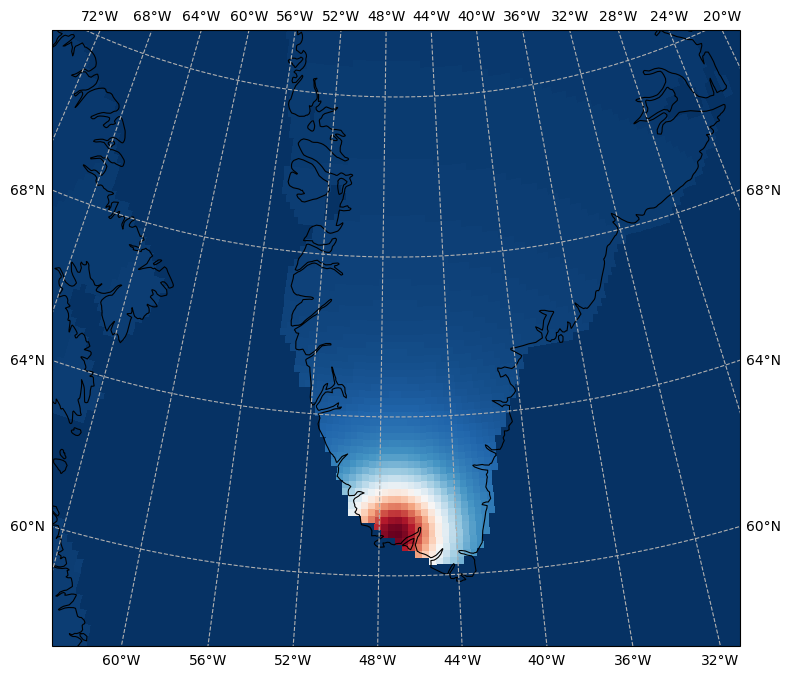

In [6]:
# Import necessary modules for this notebook. 
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from pyslfp import FingerPrint

# Set up the FingerPrint instance -- use a higher truncation to aid with plotting. 
fingerprint = FingerPrint(lmax=512)

# Set the initial sea level and ice thickness.
fingerprint.set_state_from_ice_ng()

# Set the observation point for SENU GPS station in Greenland
lat = 61.0696
lon = -47.1413

# Set the direct load
direct_load = fingerprint.northern_hemisphere_load()

# Solve the forward problem
_, displacement, _, _ = fingerprint(direct_load=direct_load, rtol=1e-9)

# Get a smoothed delta function and get the observed value.
smoothed_delta_function = fingerprint.point_load(lat, lon, smoothing_angle=1)

observed_value = fingerprint.integrate(smoothed_delta_function* displacement)
print(f'observed displacement =  {observed_value:.8f}')

# Solve the adjoint problem.
adjoint_sea_level_change, _, _, _ = fingerprint(
    displacement_load=-1*smoothed_delta_function,
    rtol=1e-9
)

# Get predicted value
predicted_value = fingerprint.integrate(adjoint_sea_level_change * direct_load)
print(f'predicted displacement =  {predicted_value:.8f}')

# Print the relative error. 
print(f'relative error = {np.abs(observed_value-predicted_value)/np.abs(observed_value)}')

# Form the ice thickness kernel
kernel = fingerprint.direct_load_from_ice_thickness_change(adjoint_sea_level_change)

# Plot the kernel.
fig, ax, im = fingerprint.plot(
    kernel,
    projection=ccrs.Orthographic(central_longitude=lon, central_latitude=lat + 8),
    map_extent=[lon - 16, lon + 16, lat - 4, lat + 12],
    lat_interval=4,
    lon_interval=4,
)
plt.show()




